# Gradient descent in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider


def cdiff(func, x0, h=1e-3):
    """Centered difference approximation of the derivative"""
    return (func(x0 + h) - func(x0 - h)) / (2 * h)


def gradient_descent(func, x0, learning_rate, num_iterations, normalize=False):
    r"""
    Gradient descent algorithm to find the minimum of a function.

    Args:
    func: function to minimize
    x0: starting x coordinate
    learning_rate: learning rate
    num_iterations: number of iterations
    normalize: normalize the gradient
    """

    result = [x0]

    for _ in range(num_iterations):
        # Use centered difference approximation to compute the gradient
        grad = cdiff(func, x0)

        # Update the x coordinate in the opposite direction of the gradient
        x1 = x0 - grad * learning_rate

        result.append(x1)
        x0 = x1

    return result


# Let's define a function to minimize and plot the result
def func(x):
    return x**2


# Hyperparameters
x0 = 10
learning_rate = 0.1
num_iterations = 100


def plot_gradient_descent(x0, learning_rate, num_iterations):
    # Generate x values for plotting
    x = np.linspace(-10, 10, 200)
    y = func(x)

    # Run gradient descent
    x_path = gradient_descent(func, x0, learning_rate, num_iterations)

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(12, 6))

    # Plot gradient descent path
    x_path = np.array(x_path)
    y_path = func(x_path)

    ax.plot(x_path, y_path, 'r.-', markersize=10, label='Gradient Descent Path')

    # Plot arrows to show direction
    for i in range(len(x_path) - 1):
        ax.annotate(
            '',
            xy=(x_path[i+1], y_path[i+1]),
            xytext=(x_path[i], y_path[i]),
            arrowprops=dict(facecolor='red', shrink=0.01, width=2),
        )

    ax.plot(x, y, 'b-', label='$f(x) = x^2$')

    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Gradient Descent Path')
    ax.legend()

    plt.show()

# Create interactive plot
interact(plot_gradient_descent,
    x0=FloatSlider(min=-10, max=10, step=1, value=9, description='Starting x'),
    learning_rate=FloatSlider(min=0.01, max=1, step=0.1, value=0.1, description='Learning Rate'),
    num_iterations=IntSlider(min=1, max=20, step=1, value=3, description='Number of Iterations'))


interactive(children=(FloatSlider(value=9.0, description='Starting x', max=10.0, min=-10.0, step=1.0), FloatSl…

<function __main__.plot_gradient_descent(x0, learning_rate, num_iterations)>

# Gradient descent in 3D for parabaloid

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider


def f2d(vector):
    r"""
    3d Paraboloid function $f(x, y) = x^2 + y^2$.

    Args:
    vector: A 2D numpy array or list with shape (2,) representing (x, y) coordinates.

    Returns:
    Value of the function at point (x, y)
    """
    x, y = vector
    return x**2 + y**2


def grad_f2d(vector):
    """
    Gradient of the function $f(x, y) = x^2 + y^2$.

    Args:
    vector: A 2D numpy array or list with shape (2,) representing (x, y) coordinates.

    Returns:
    Gradient of the function at point (x, y) as a numpy array.
    """
    x, y = vector
    return np.array([2*x, 2*y])


def gradient_descent3d(start_vector, learning_rate, num_iterations):
    path = [start_vector]
    for _ in range(num_iterations):
        grad = grad_f2d(start_vector)
        start_vector = start_vector - learning_rate * grad
        path.append(start_vector)
    return np.array(path)


def plot_gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Create the surface
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f2d(np.array([X, Y]))

    # Perform gradient descent
    start_vector = np.array([start_x, start_y])
    path = gradient_descent3d(start_vector, learning_rate, num_iterations)

    # Create the figure and subplots
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    # 3D plot
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.plot(path[:, 0], path[:, 1], f2d(path.T), 'r.-', linewidth=2, markersize=20)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D Gradient Descent Visualization')

    # 2D contour plot with filled contours for depth
    contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
    ax2.plot(path[:, 0], path[:, 1], 'r>-', linewidth=2, markersize=10)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('2D Contour Plot with Gradient Descent Path')

    # Add color bars
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
    fig.colorbar(contour, ax=ax2)

    plt.tight_layout()
    plt.close(fig)
    return fig


# Create interactive plot
interact(plot_gradient_descent, 
         start_x=FloatSlider(min=-10, max=10, step=0.1, value=8, description='Start X'),
         start_y=FloatSlider(min=-10, max=10, step=0.1, value=8, description='Start Y'),
         learning_rate=FloatSlider(min=0.01, max=0.95, step=0.01, value=0.1, description='Learning Rate'),
         num_iterations=IntSlider(min=1, max=50, step=1, value=20, description='Iterations'))

interactive(children=(FloatSlider(value=8.0, description='Start X', max=10.0, min=-10.0), FloatSlider(value=8.…

<function __main__.plot_gradient_descent(start_x, start_y, learning_rate, num_iterations)>

# Falling into the Local Minimum

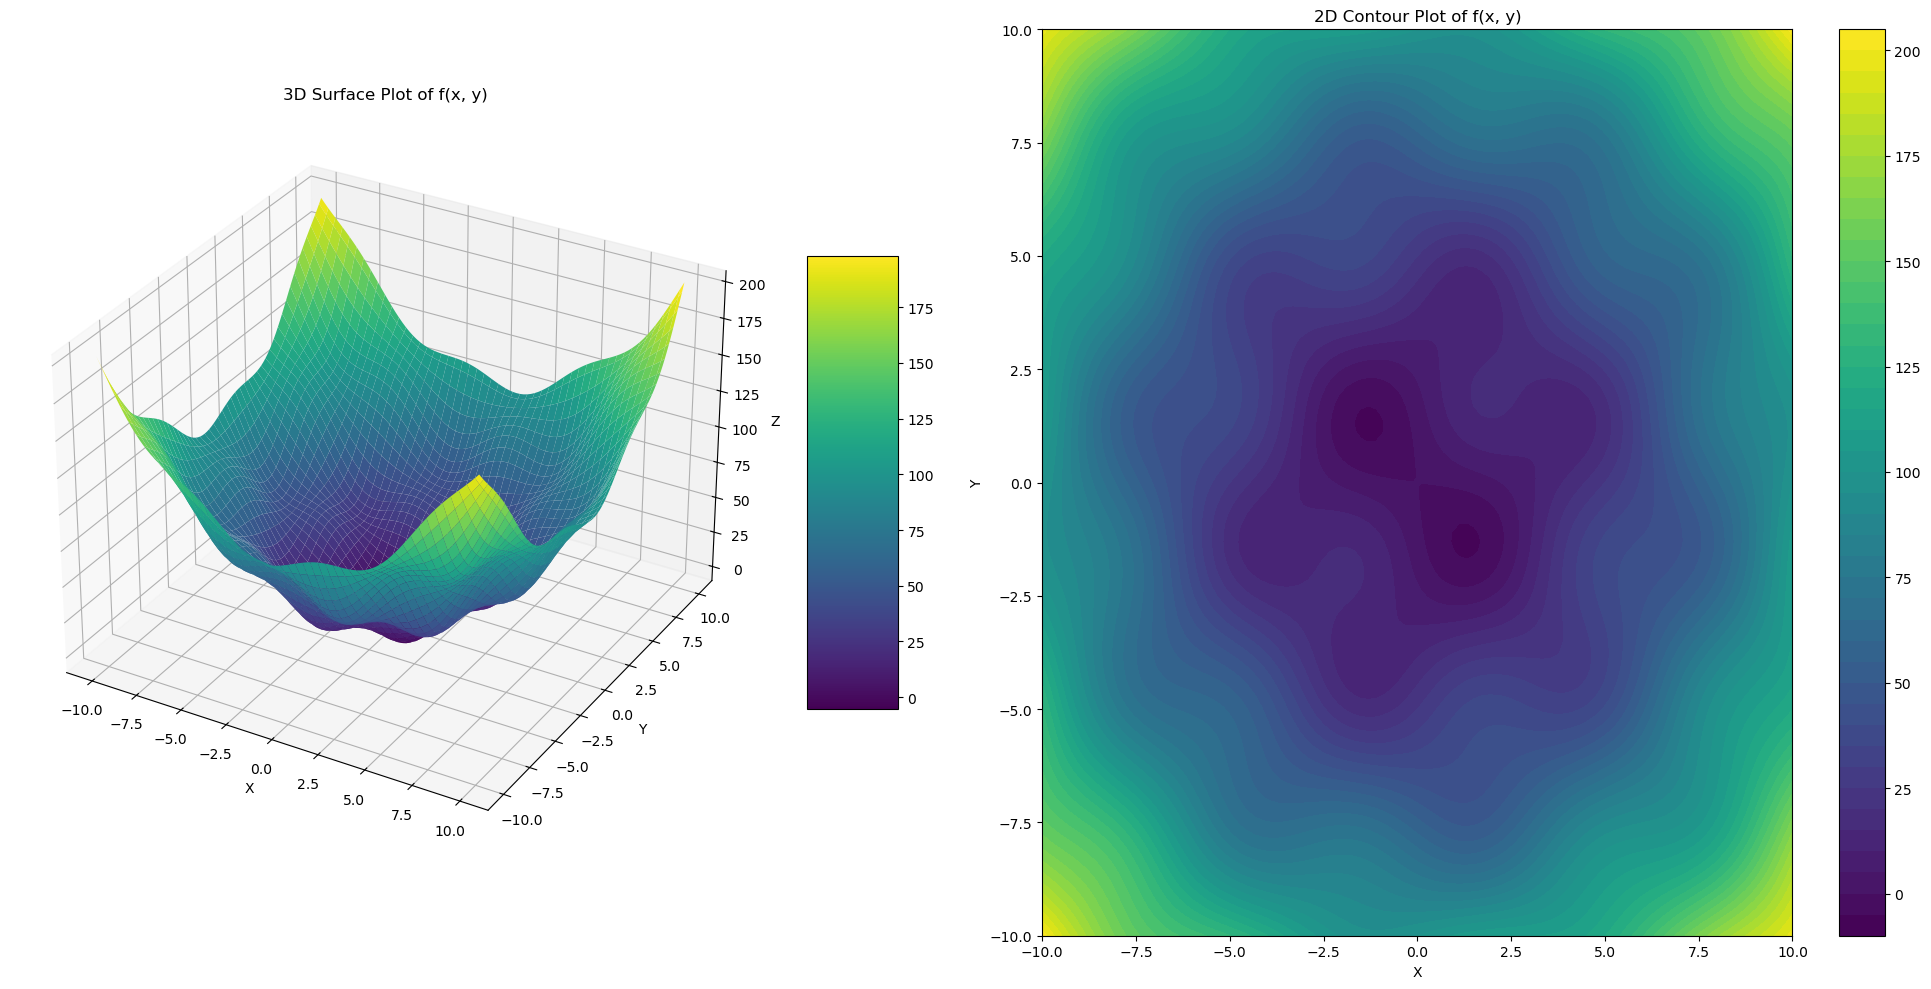

In [ ]:
import numpy as np


def f3d(vector):
    """
    Modified 3D function: f(x, y) = x^2 + y^2 + 10*sin(x)*sin(y).

    Args:
    vector: A 2D numpy array or list with shape (2,) representing (x, y) coordinates.

    Returns:
    Value of the function at point (x, y)
    """
    x, y = vector
    return x**2 + y**2 + 10 * np.sin(x) * np.sin(y)


def grad_f3d(vector):
    """
    Gradient of the function f(x, y) = x^2 + y^2 + 10*sin(x)*sin(y).

    Args:
    vector: A 2D numpy array or list with shape (2,) representing (x, y) coordinates.

    Returns:
    Gradient of the function at point (x, y) as a numpy array.
    """
    x, y = vector
    dx = 2*x + 10 * np.cos(x) * np.sin(y)
    dy = 2*y + 10 * np.sin(x) * np.cos(y)
    return np.array([dx, dy])



# Generate data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f3d([X, Y])

# Create new figure for 3D plot
fig = plt.figure(figsize=(20, 10))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('3D Surface Plot of f(x, y)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5, ax=ax1)

# 2D contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
ax2.set_title('2D Contour Plot of f(x, y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple


class Optimizer:
    """
    A class for performing gradient-based optimization techniques.
    
    Attributes:
        f (Callable[[np.ndarray], float]): The objective function to minimize.
        grad_f (Callable[[np.ndarray], np.ndarray]): The gradient of the objective function.
    """

    f: Callable[[np.ndarray], float]
    grad_f: Callable[[np.ndarray], np.ndarray]

    def __init__(self, f: Callable[[np.ndarray], float], grad_f: Callable[[np.ndarray], np.ndarray]):
        """
        Initialize the OptimizationSolver with the objective function and its gradient.

        Args:
            f (Callable[[np.ndarray], float]): The function to minimize.
            grad_f (Callable[[np.ndarray], np.ndarray]): The gradient of the function.
        """
        self.f = f
        self.grad_f = grad_f


    def gradient_descent(
        self,
        start_point: np.ndarray,
        learning_rate: float = 0.1,
        num_iterations: int = 10,
        momentum: float = 0
    ) -> np.ndarray:
        """
        Perform gradient descent optimization with optional momentum and regularization.

        Args:
            start_point (np.ndarray): Initial guess for the optimization.
            learning_rate (float): Step size for each iteration.
            num_iterations (int): Maximum number of iterations to perform.
            momentum (float): Momentum factor if momentum is used.

        Returns:
            np.ndarray: Path of points visited during optimization.
        """

        path = [start_point]

        # Init the momentum velocity
        velocity = np.zeros_like(start_point)

        for _ in range(num_iterations):
            grad = self.grad_f(start_point)

            if momentum > 0:
                velocity = momentum * velocity - learning_rate * grad
                new_point = start_point + velocity
            else:
                new_point = start_point - learning_rate * grad

            start_point = new_point
            path.append(new_point)

        return np.array(path)


    def plot_gradient_descent(self, path: np.ndarray, min_max: Tuple[int, int] = (-15, 15)) -> plt.Figure:
        """
        Visualize the gradient descent path on the Ackley function in both 3D and 2D.

        Args:
            path (np.ndarray): Path of points visited during optimization.
            min_max (Tuple[int, int]): Min and max values on the grid.

        Returns:
            plt.Figure: Matplotlib figure object containing the plots.
        """

        # Create the surface
        x = y = np.linspace(min_max[0], min_max[1], 100)
        X, Y = np.meshgrid(x, y)

        last_point = path[-1]
        first_point = path[0]
        
        Z = np.zeros_like(X)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i, j] = self.f(np.array([X[i, j], Y[i, j]]))

        # Create the figure and subplots
        fig = plt.figure(figsize=(20, 10))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122)

        # 3D plot
        surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
        # Plot the path from the user-defined start
        Z_path = [self.f(point) for point in path]
        ax1.plot(path[:, 0], path[:, 1], Z_path, 'r.-', linewidth=2, markersize=5, label='User-defined Start')

        point_size = 300

        # Plot the best point found by multi-start (Here we use the last point as we've only done one descent)
        ax1.scatter(first_point[0], first_point[1], self.f(first_point), s=point_size, c='b', marker='*', label='First Point')
        ax1.scatter(last_point[0], last_point[1], self.f(last_point), s=point_size, c='g', marker='*', label='Last Point')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title('3D Gradient Descent Visualization on Ackley Function')
        ax1.legend()

        # 2D contour plot with filled contours for depth
        contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
        ax2.plot(path[:, 0], path[:, 1], 'r>-', linewidth=2, markersize=5, label='User-defined Start')
        ax2.scatter(first_point[0], first_point[1], s=point_size, c='b', marker='*', label='First Point')
        ax2.scatter(last_point[0], last_point[1], s=point_size, c='g', marker='*', label='Last Point')
        
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_title('2D Contour Plot with Gradient Descent Path on Ackley Function')
        ax2.legend()

        # Add color bars
        fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
        fig.colorbar(contour, ax=ax2)

        plt.tight_layout()
        plt.close(fig)
        return fig


    def compare_momentum_paths(
        self,
        start_point: np.ndarray,
        learning_rate: float = 0.1,
        num_iterations: int = 10,
        momentum: float = 0.9,
        min_max: Tuple[int, int] = (-15, 15)
    ) -> plt.Figure:
        """
        Compare gradient descent paths with and without momentum.

        Args:
            start_point (np.ndarray): Initial guess for the optimization.
            learning_rate (float): Step size for each iteration.
            num_iterations (int): Maximum number of iterations to perform.
            momentum (float): Momentum factor to use.
            min_max (Tuple[int, int]): Min and max values on the grid.

        Returns:
            plt.Figure: Matplotlib figure object comparing paths with and without momentum.
        """

        # Path without momentum
        path_no_momentum = self.gradient_descent(
            start_point,
            learning_rate=learning_rate,
            num_iterations=num_iterations,
            momentum=0
        )

        # Path with momentum
        path_with_momentum = self.gradient_descent(
            start_point,
            learning_rate=learning_rate,
            num_iterations=num_iterations,
            momentum=momentum
        )

        # Create the surface
        x = y = np.linspace(min_max[0], min_max[1], 100)
        X, Y = np.meshgrid(x, y)
        
        Z = np.zeros_like(X)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i, j] = self.f(np.array([X[i, j], Y[i, j]]))

        # Create the figure and subplots
        fig = plt.figure(figsize=(20, 10))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122)

        # 3D plot
        surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
        
        # Compute function values for paths
        Z_path_no_momentum = [self.f(point) for point in path_no_momentum]
        Z_path_with_momentum = [self.f(point) for point in path_with_momentum]

        # Plot paths
        ax1.plot(path_no_momentum[:, 0], path_no_momentum[:, 1], Z_path_no_momentum, 
                'r.-', linewidth=2, markersize=5, label='No Momentum')
        ax1.plot(path_with_momentum[:, 0], path_with_momentum[:, 1], Z_path_with_momentum, 
                'b.-', linewidth=2, markersize=5, label='With Momentum')

        # Plot start and end points
        point_size = 300
        ax1.scatter(start_point[0], start_point[1], self.f(start_point), 
                    s=point_size, c='g', marker='*', label='Start Point')
        
        # Last points for each path
        ax1.scatter(path_no_momentum[-1, 0], path_no_momentum[-1, 1], self.f(path_no_momentum[-1]), 
                    s=point_size, c='r', marker='o', label='End (No Momentum)')
        ax1.scatter(path_with_momentum[-1, 0], path_with_momentum[-1, 1], self.f(path_with_momentum[-1]), 
                    s=point_size, c='b', marker='o', label='End (With Momentum)')

        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title('3D Gradient Descent: Momentum Comparison')
        ax1.legend()

        # 2D Contour Plot
        contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
        
        # Plot 2D paths
        ax2.plot(path_no_momentum[:, 0], path_no_momentum[:, 1], 'r>-', 
                linewidth=2, markersize=5, label='No Momentum')
        ax2.plot(path_with_momentum[:, 0], path_with_momentum[:, 1], 'b>-', 
                linewidth=2, markersize=5, label='With Momentum')

        # Plot start and end points
        ax2.scatter(start_point[0], start_point[1], 
                    s=point_size, c='g', marker='*', label='Start Point')
        ax2.scatter(path_no_momentum[-1, 0], path_no_momentum[-1, 1], 
                    s=point_size, c='r', marker='o', label='End (No Momentum)')
        ax2.scatter(path_with_momentum[-1, 0], path_with_momentum[-1, 1], 
                    s=point_size, c='b', marker='o', label='End (With Momentum)')

        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_title('2D Contour: Momentum Comparison')
        ax2.legend()

        # Add color bars
        fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
        fig.colorbar(contour, ax=ax2)

        plt.tight_layout()
        plt.close(fig)
        return fig



In [5]:
from ipywidgets import interact, FloatSlider, IntSlider

def build_grad_and_plot(start_x, start_y, learning_rate, num_iterations, momentum):
    start_point = np.array([start_x, start_y])
    optimizer = Optimizer(f3d, grad_f3d)
    # Compare paths with different momentum values
    return optimizer.compare_momentum_paths(
        start_point, 
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        momentum=momentum
    )


# Create interactive plot
interact(build_grad_and_plot, 
         start_x=FloatSlider(min=-10, max=10, step=0.1, value=7.11, description='Start X'),
         start_y=FloatSlider(min=-10, max=10, step=0.1, value=6.97, description='Start Y'),
         learning_rate=FloatSlider(min=0.01, max=0.95, step=0.01, value=0.1, description='Learning Rate'),
         num_iterations=IntSlider(min=1, max=100, step=1, value=10, description='Iterations'),
         momentum=FloatSlider(min=0, max=0.95, step=0.01, value=0, description='Momentum'))



interactive(children=(FloatSlider(value=7.11, description='Start X', max=10.0, min=-10.0), FloatSlider(value=6…

<function __main__.build_grad_and_plot(start_x, start_y, learning_rate, num_iterations, momentum)>